# Question 1


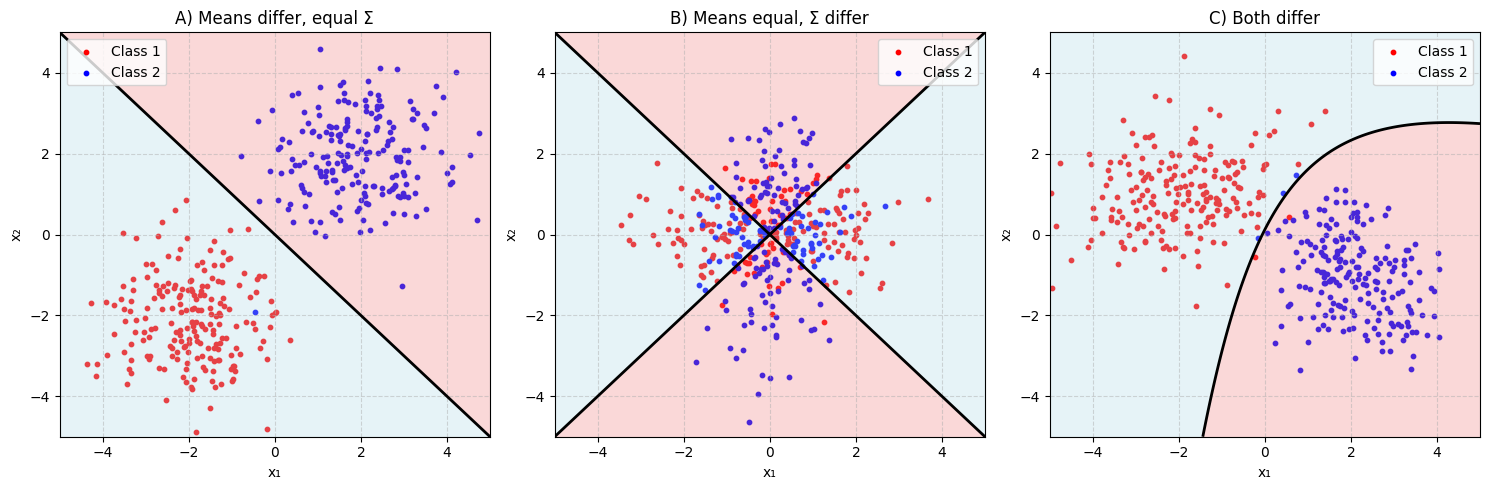

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_discriminant(mu1, Σ1, mu2, Σ2):
    """
    Returns δ(x, y) = ln p([x,y]|C1) - ln p([x,y]|C2)
    for two 2D Gaussians with means mu1, mu2 and covariances Σ1, Σ2.
    """
    Σ1_inv = np.linalg.inv(Σ1)
    Σ2_inv = np.linalg.inv(Σ2)
    log_det_ratio = 0.5 * np.log(np.linalg.det(Σ2) / np.linalg.det(Σ1))

    def δ(x, y):
        v = np.array([x, y])
        term1 = -0.5 * (v - mu1) @ Σ1_inv @ (v - mu1)
        term2 =  0.5 * (v - mu2) @ Σ2_inv @ (v - mu2)
        return term1 + term2 - log_det_ratio

    return δ

def plot_2d_decision_colored(delta, mu1, mu2, Σ1, Σ2, title, ax, n_samples=200):
    """
    Scatter-samples from two Gaussians, colors decision regions, and overlays δ=0.
    """
    # Sample points
    pts1 = np.random.multivariate_normal(mu1, Σ1, size=n_samples)
    pts2 = np.random.multivariate_normal(mu2, Σ2, size=n_samples)

    # Plot samples
    ax.scatter(pts1[:,0], pts1[:,1], s=10, c='red',  label='Class 1')
    ax.scatter(pts2[:,0], pts2[:,1], s=10, c='blue', label='Class 2')

    # Grid for boundary
    xx = np.linspace(-5, 5, 300)
    yy = np.linspace(-5, 5, 300)
    X, Y = np.meshgrid(xx, yy)
    Z = np.vectorize(delta)(X, Y)

    # Fill decision regions: red for δ>0, blue for δ<0
    ax.contourf(X, Y, Z, levels=[Z.min(), 0, Z.max()],
                colors=['lightcoral', 'lightblue'], alpha=0.3)
    # Contour δ=0
    ax.contour(X, Y, Z, levels=[0], colors='k', linewidths=2)

    ax.set_title(title)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

# --- Scenario definitions ---

# A) Means differ, equal Σ
mu1_A = np.array([-2, -2])
mu2_A = np.array([ 2,  2])
Σ_A   = np.eye(2)
δA = gaussian_discriminant(mu1_A, Σ_A, mu2_A, Σ_A)

# B) Means equal, Σ differ
mu1_B = np.array([0, 0])
mu2_B = np.array([0, 0])
Σ1_B  = np.diag([2, 0.5])
Σ2_B  = np.diag([0.5, 2])
δB = gaussian_discriminant(mu1_B, Σ1_B, mu2_B, Σ2_B)

# C) Both means and Σ differ
mu1_C = np.array([-2, 1])
mu2_C = np.array([ 2,-1])
Σ1_C  = np.array([[1.5, 0.3], [0.3, 1]])
Σ2_C  = np.array([[1,  -0.4],[-0.4, 1.2]])
δC = gaussian_discriminant(mu1_C, Σ1_C, mu2_C, Σ2_C)

# --- Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_2d_decision_colored(δA, mu1_A, mu2_A, Σ_A,   Σ_A,   "A) Means differ, equal Σ", axes[0])
plot_2d_decision_colored(δB, mu1_B, mu2_B, Σ1_B,  Σ2_B,  "B) Means equal, Σ differ", axes[1])
plot_2d_decision_colored(δC, mu1_C, mu2_C, Σ1_C,  Σ2_C,  "C) Both differ", axes[2])

plt.tight_layout()
plt.show()


# Question 3

<ipython-input-2-4bee65aff120>:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


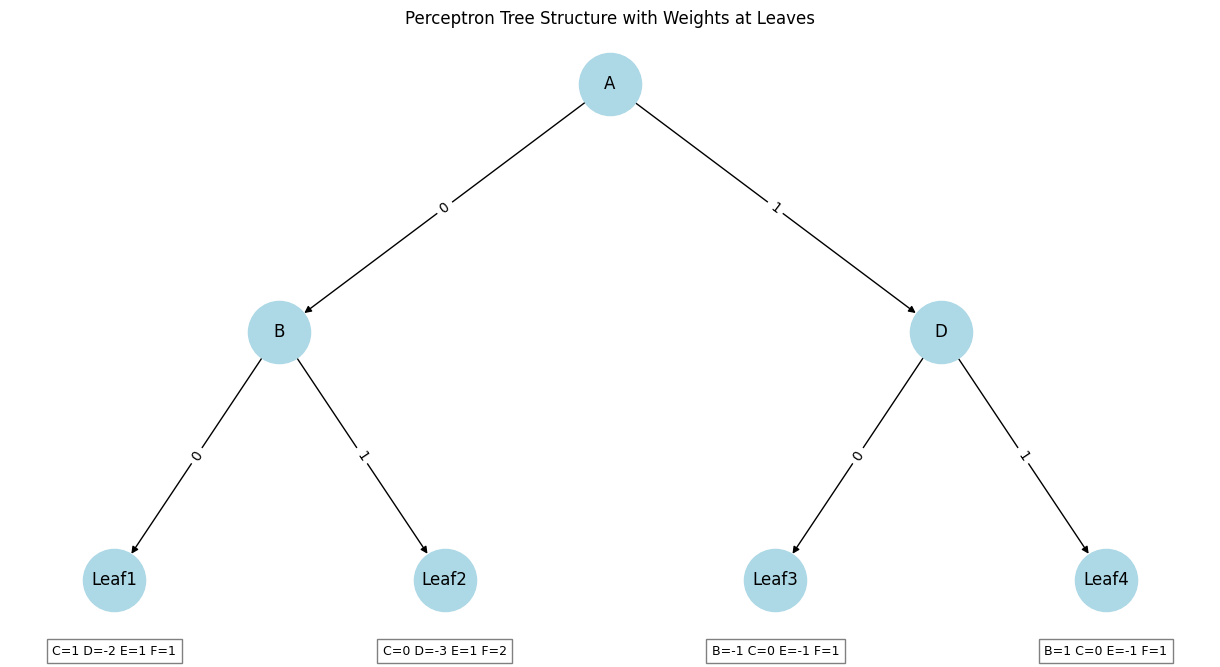

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Construct the decision tree with perceptron leaves
G = nx.DiGraph()

# Add internal decision nodes
G.add_node("A")
G.add_node("B")
G.add_node("D")

# Add edges from decision nodes
G.add_edge("A", "B", label="0")
G.add_edge("A", "D", label="1")
G.add_edge("B", "Leaf1", label="0")
G.add_edge("B", "Leaf2", label="1")
G.add_edge("D", "Leaf3", label="0")
G.add_edge("D", "Leaf4", label="1")

# Position of nodes for drawing
pos = {
    "A": (0, 2),
    "B": (-2, 1),
    "D": (2, 1),
    "Leaf1": (-3, 0),
    "Leaf2": (-1, 0),
    "Leaf3": (1, 0),
    "Leaf4": (3, 0)
}

# Perceptron weights shown in each leaf
leaf_weights = {
    "Leaf1": "C=1 D=-2 E=1 F=1",
    "Leaf2": "C=0 D=-3 E=1 F=2",
    "Leaf3": "B=-1 C=0 E=-1 F=1",
    "Leaf4": "B=1 C=0 E=-1 F=1"
}

# Draw the graph
plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Annotate leaves with weights
for leaf, text in leaf_weights.items():
    x, y = pos[leaf]
    plt.text(x, y - 0.3, text, ha='center', fontsize=9, bbox=dict(facecolor='white', edgecolor='gray'))

plt.title("Perceptron Tree Structure with Weights at Leaves")
plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# Input vector
x = [1, 1, 0, 1, 0, 1]  # [A, B, C, D, E, F]

# Step 1: Tree traversal
# Node A checks x[0] = A
if x[0] == 0:
    # Node B checks x[1] = B
    if x[1] == 0:
        weights = [1, -2, 1, 1]  # [C, D, E, F]
        features = [x[2], x[3], x[4], x[5]]
        bias = 1
    else:
        weights = [0, -3, 1, 2]
        features = [x[2], x[3], x[4], x[5]]
        bias = 1
else:
    # Node D checks x[3] = D
    if x[3] == 0:
        weights = [-1, 0, -1, 1]  # [B, C, E, F]
        features = [x[1], x[2], x[4], x[5]]
        bias = 1
    else:
        weights = [1, 0, -1, 1]  # [B, C, E, F]
        features = [x[1], x[2], x[4], x[5]]
        bias = 1

# Step 2: Perceptron prediction
z = np.dot(weights, features) + bias
output = np.sign(z)

print("Linear output (z):", z)
print("Predicted class:", int(output))


Linear output (z): 3
Predicted class: 1


#Question 4

Fetching Dataset


In [ ]:
from sklearn.datasets import fetch_covtype
import pandas as pd

data = fetch_covtype()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)


In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

,0
0,5
1,5
2,2
3,2
4,5


In [ ]:
# Check for NaN or null values
print("Any NaN in X:", X.isna().sum().sum() > 0)
print("Any NaN in y:", y.isna().sum().sum() > 0)

# Check data ranges
print("Feature ranges (min to max):")
print(X.describe().loc[['min', 'max']])

Any NaN in X: False
Any NaN in y: False
Feature ranges (min to max):
         0      1     2       3      4       5      6      7      8       9   \
min  1859.0    0.0   0.0     0.0 -173.0     0.0    0.0    0.0    0.0     0.0   
max  3858.0  360.0  66.0  1397.0  601.0  7117.0  254.0  254.0  254.0  7173.0   

     ...   44   45   46   47   48   49   50   51   52   53  
min  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
max  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 54 columns]


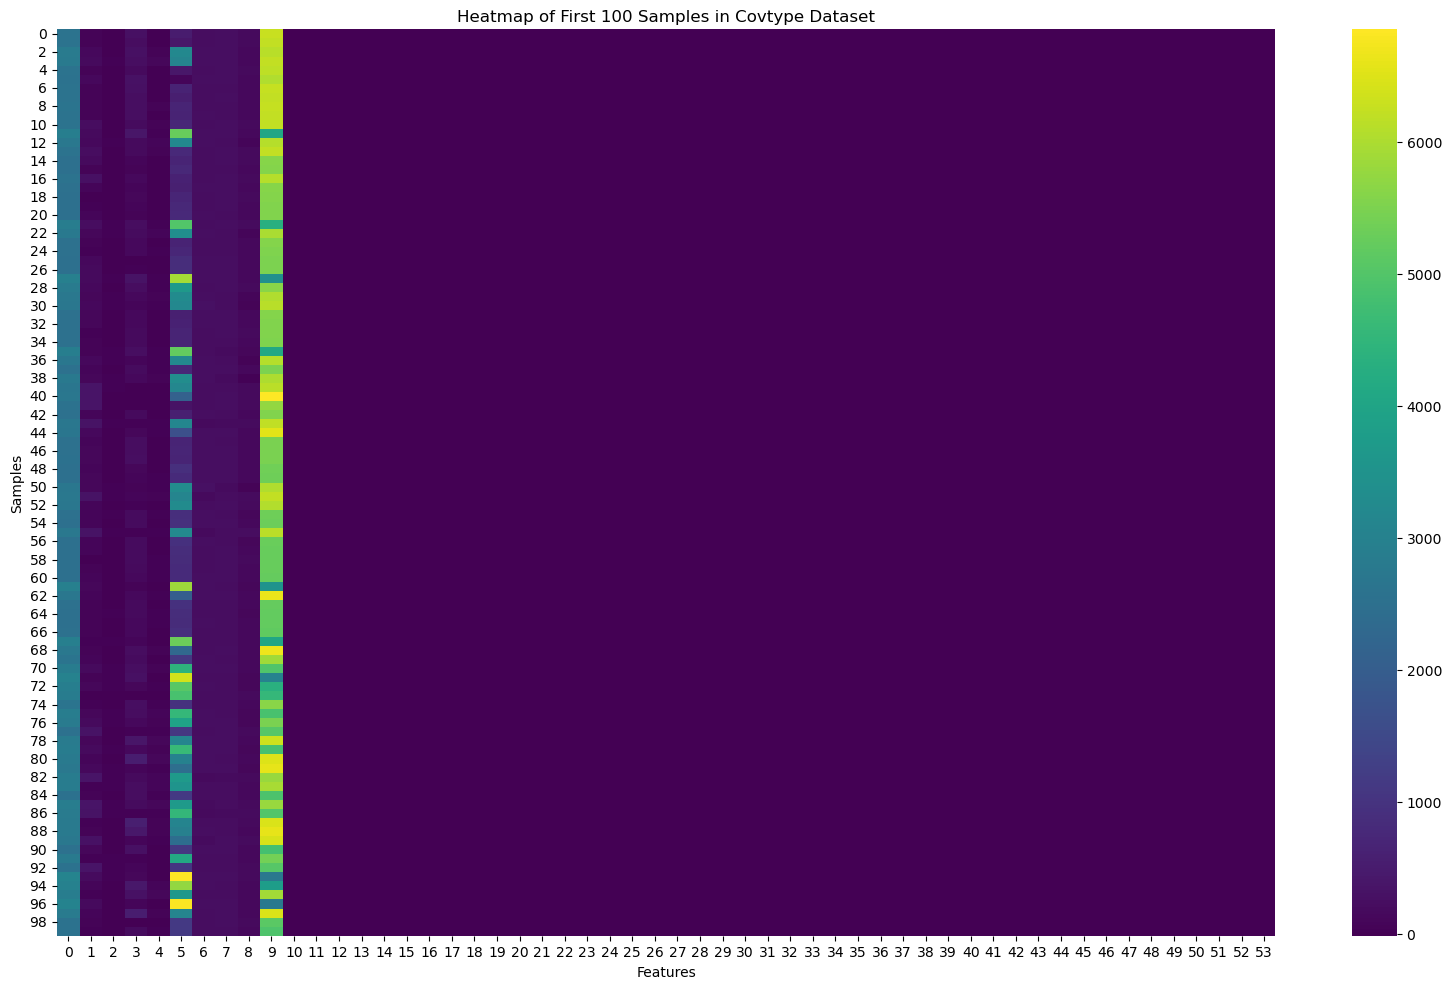

In [ ]:
import seaborn as sns


# Sample the first 100 rows for visualization
X_sample = X.iloc[:100]

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(X_sample, cmap="viridis", cbar=True)
plt.title("Heatmap of First 100 Samples in Covtype Dataset")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()

In [ ]:
# Select columns 10 to end
X_bin = X.iloc[:, 10:]

# Check which columns are strictly binary (only 0 and 1)
binary_check = X_bin.apply(lambda col: set(col.unique()).issubset({0, 1}))

# Check which columns are all zero
all_zero_check = X_bin.apply(lambda col: col.nunique() == 1 and col.unique()[0] == 0)

# Print summary
print("Binary columns from index 10 onward:")
print(binary_check[binary_check].index.tolist())

print("\nColumns that are all zero:")
print(all_zero_check[all_zero_check].index.tolist())

Binary columns from index 10 onward:
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]

Columns that are all zero:
[]


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np


# Separate continuous and binary features
X_cont = X.iloc[:, :10]     # Continuous columns
X_bin = X.iloc[:, 10:]      # Binary columns

# Scale continuous features
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)

# Combine scaled continuous and binary features
X_final = np.hstack((X_cont_scaled, X_bin))

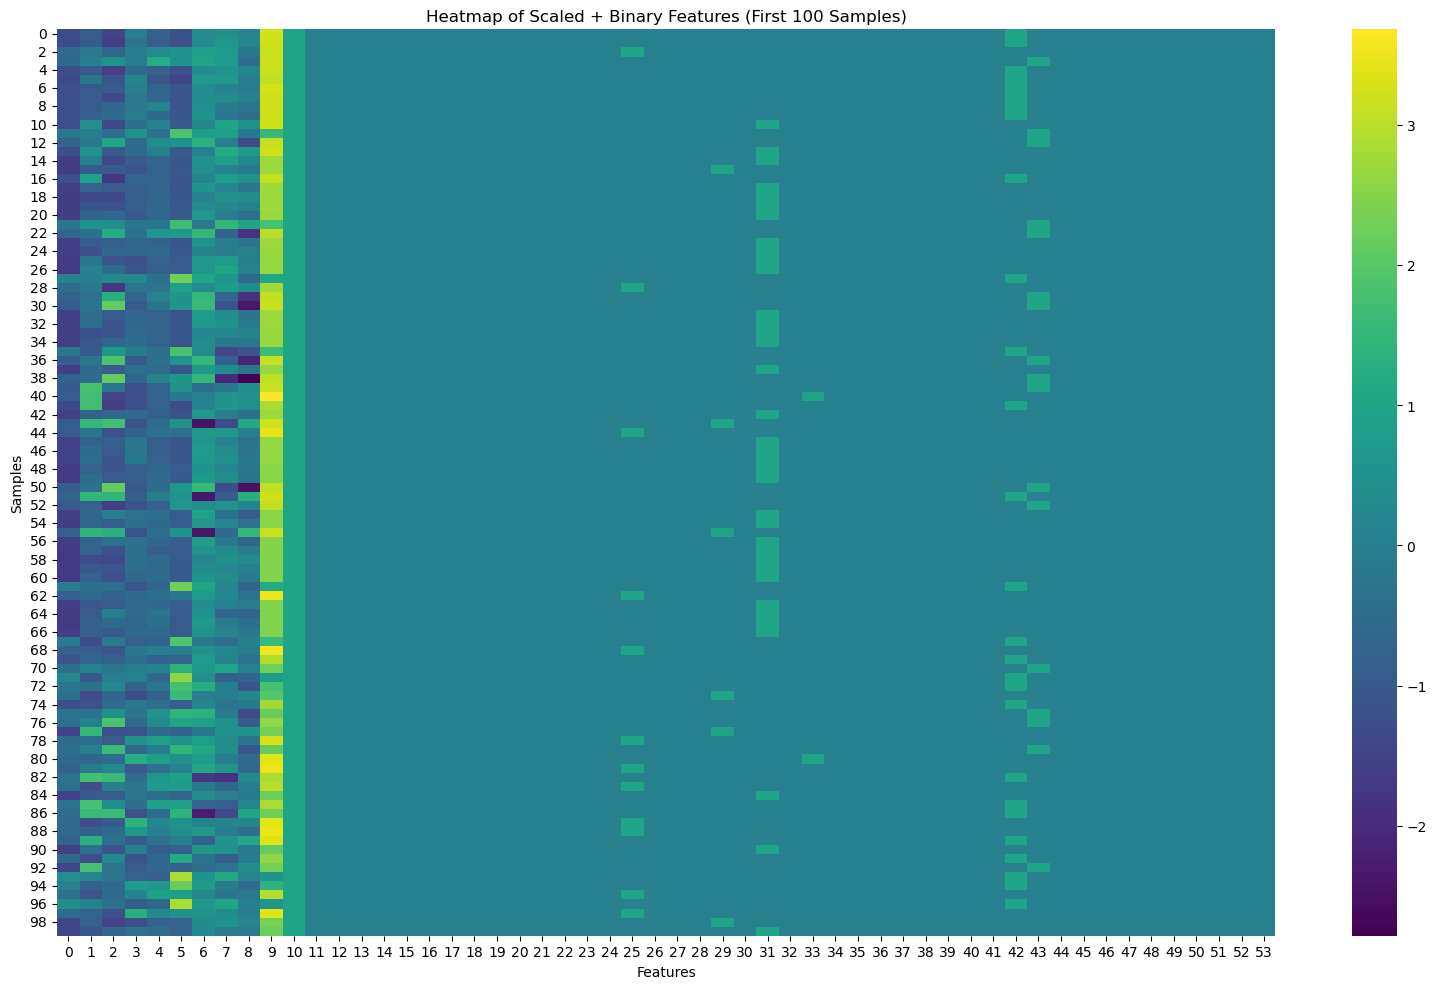

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from X_final for plotting (first 100 samples)
X_final_df = pd.DataFrame(X_final)
X_sample = X_final_df.iloc[:100]

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(X_sample, cmap="viridis", cbar=True)
plt.title("Heatmap of Scaled + Binary Features (First 100 Samples)")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)



In [ ]:
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))


Length of X_train: 464809
Length of X_test: 116203
Length of y_train: 464809
Length of y_test: 116203


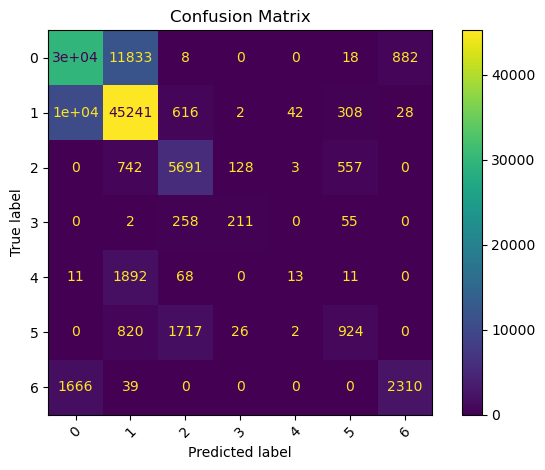

Accuracy: 0.7246456631928607
Precision: 0.7123276648670798
Recall: 0.7246456631928607
F1 Score: 0.7146470068212984


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Flatten y for compatibility with sklearn models
y_train = y_train.ravel()
y_test = y_test.ravel()

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate with four metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

# Create confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print it
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.68      0.80      0.74      7121
           4       0.57      0.40      0.47       526
           5       0.22      0.01      0.01      1995
           6       0.49      0.26      0.34      3489
           7       0.72      0.58      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



Decision Tree Evaluation:
Accuracy: 0.9387881552111391
Precision: 0.9387625044465002
Recall: 0.9387881552111391
F1 Score: 0.9387709857599738

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.85      0.81      0.83       526
           5       0.84      0.83      0.83      1995
           6       0.88      0.88      0.88      3489
           7       0.94      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



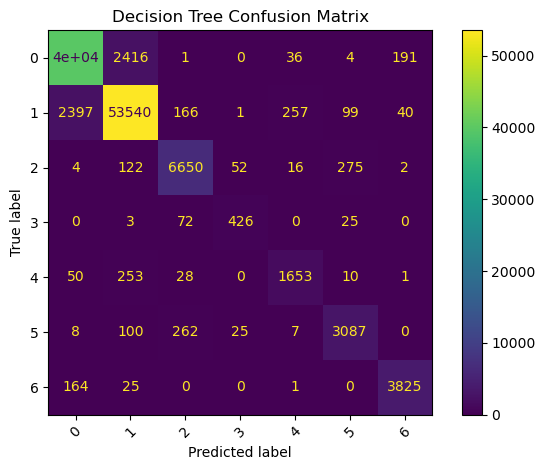

In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = fetch_covtype()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

# Separate features
X_cont = X.iloc[:, :10]       # Continuous
X_bin = X.iloc[:, 10:]        # Binary

# Scale continuous features
scaler = StandardScaler()
X_cont_scaled = scaler.fit_transform(X_cont)

# Combine scaled + binary
X_final = np.hstack((X_cont_scaled, X_bin))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Train decision tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred = dtree.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Print metrics
print("Decision Tree Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.show()


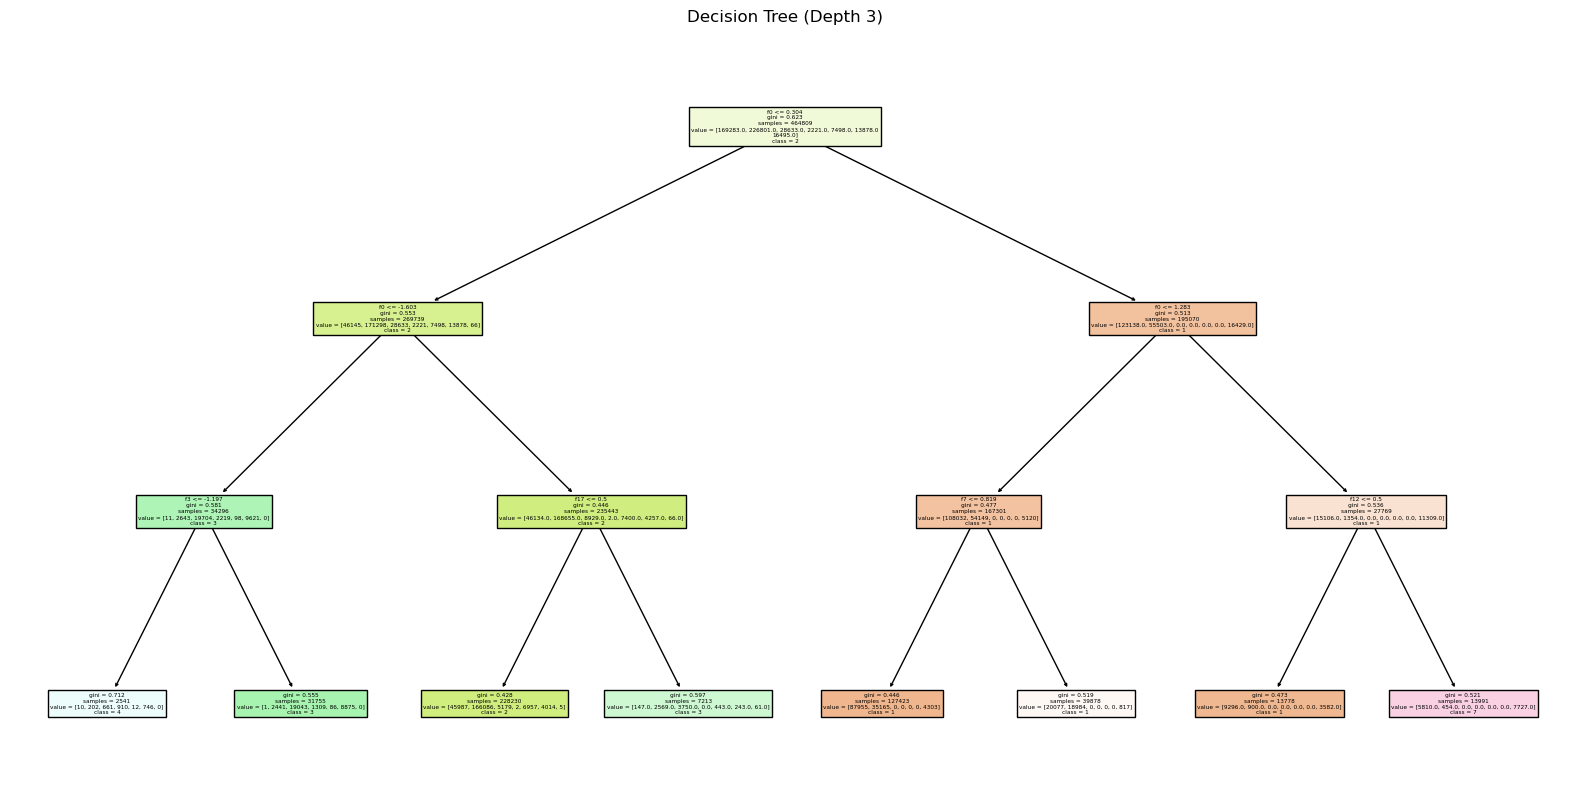

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Limit depth of tree for visualization (optional)
dtree_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_viz.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dtree_viz, filled=True, feature_names=[f"f{i}" for i in range(X_train.shape[1])], class_names=[str(i) for i in np.unique(y_train)])
plt.title("Decision Tree (Depth 3)")
plt.show()


In [ ]:
# 6. Feature Importance
importances = dtree.feature_importances_
important_features = sorted(zip(importances, [f"f{i}" for i in range(X_train.shape[1])]), reverse=True)[:10]

print("\n=== Decision Tree Evaluation ===")
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision (wtd): {precision:.4f}")
print(f"Recall (wtd)   : {recall:.4f}")
print(f"F1 Score (wtd) : {f1:.4f}")
print("\nClassification Report:\n", report)

print("Top 10 Most Important Features:")
for score, name in important_features:
    print(f"{name}: {score:.4f}")



=== Decision Tree Evaluation ===
Accuracy       : 0.9388
Precision (wtd): 0.9388
Recall (wtd)   : 0.9388
F1 Score (wtd) : 0.9388

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.85      0.81      0.83       526
           5       0.84      0.83      0.83      1995
           6       0.88      0.88      0.88      3489
           7       0.94      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203

Top 10 Most Important Features:
f0: 0.3377
f5: 0.1491
f9: 0.1437
f3: 0.0624
f4: 0.0435
f7: 0.0325
f6: 0.0296
f1: 0.0269
f8: 0.0247
f2: 0.0151


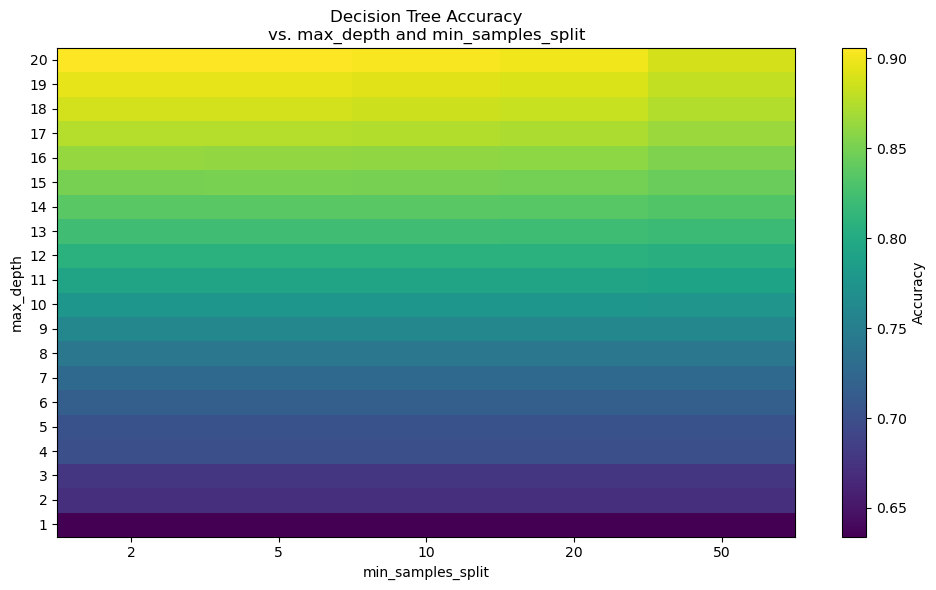

In [ ]:
# Define hyperparameter ranges
max_depth_values = range(1, 21)
min_samples_split_values = [2, 5, 10, 20, 50]

# Store accuracy results
results = []
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "accuracy": accuracy
        })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Create a pivot table for heatmap
pivot_table = results_df.pivot(index="max_depth", columns="min_samples_split", values="accuracy")

# Plot heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(pivot_table, aspect='auto', cmap="viridis", origin="lower")
plt.colorbar(heatmap, label="Accuracy")
plt.xticks(ticks=range(len(min_samples_split_values)), labels=min_samples_split_values)
plt.yticks(ticks=range(len(max_depth_values)), labels=max_depth_values)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("Decision Tree Accuracy\nvs. max_depth and min_samples_split")
plt.tight_layout()
plt.show()

# Question 5


In [ ]:
import gdown


gdown.download("https://drive.google.com/uc?id=1PkENuoGgNEEcnyXIVb0T-cudjz7BzcBj", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1PkENuoGgNEEcnyXIVb0T-cudjz7BzcBj
To: /content/synthetic_hand_motion_data.csv
100%|██████████| 31.7k/31.7k [00:00<00:00, 11.8MB/s]


'synthetic_hand_motion_data.csv'

In [ ]:
import pandas as pd

# خواندن فایل CSV
df = pd.read_csv('synthetic_hand_motion_data.csv')

# نمایش اولین ردیف‌های داده
print("🧾 First 5 rows of the dataset:")
print(df.head())

# نمایش اطلاعات کلی درباره ویژگی‌ها
print("\n📊 Info about dataset:")
print(df.info())

# نمایش آمار توصیفی ویژگی‌های عددی
print("\n📈 Statistical summary:")
print(df.describe())

# نمایش تعداد مقادیر یکتا برای هر ستون (برای بررسی متغیرهای طبقه‌ای احتمالی)
print("\n🔍 Unique value counts per column:")
print(df.nunique())


🧾 First 5 rows of the dataset:
      acc_x     acc_y     acc_z  label
0  1.151395 -0.279748 -0.276819    1.0
1  0.621436 -0.094628 -0.213752    1.0
2  0.710843 -0.197842 -0.245857    1.0
3  1.360932 -0.120290 -0.562167    1.0
4  1.261405  0.109458 -0.201112    1.0

📊 Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   acc_x   500 non-null    float64
 1   acc_y   500 non-null    float64
 2   acc_z   500 non-null    float64
 3   label   500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB
None

📈 Statistical summary:
            acc_x       acc_y       acc_z      label
count  500.000000  500.000000  500.000000  500.00000
mean     0.451144    0.462633   -0.012018    1.65000
std      0.622447    0.614726    0.335007    0.65449
min     -1.454654   -1.675448   -1.336931    1.00000
25%     -0.038122   -0.016671   -0.202145    1.0000

In [ ]:
df.head()

,acc_x,acc_y,acc_z,label
0,1.151395,-0.279748,-0.276819,1.0
1,0.621436,-0.094628,-0.213752,1.0
2,0.710843,-0.197842,-0.245857,1.0
3,1.360932,-0.120290,-0.562167,1.0
4,1.261405,0.109458,-0.201112,1.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6828\1249466706.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='Set2')


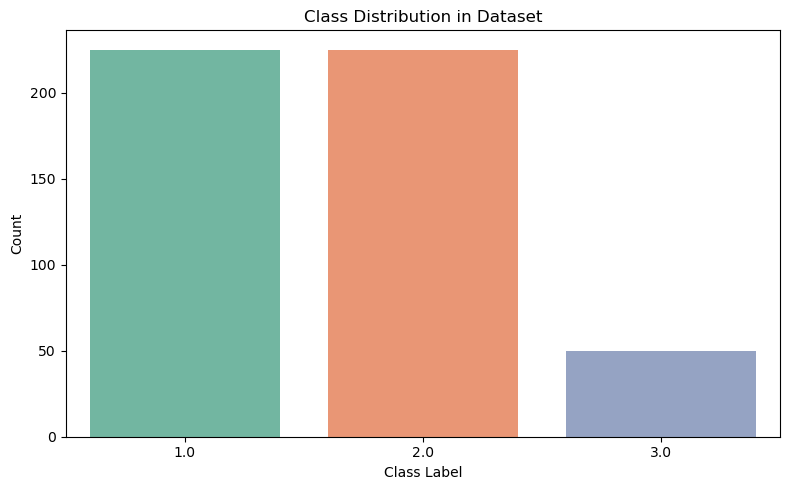

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=labels, palette='Set2')
plt.title("Class Distribution in Dataset")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# Step 1: Load the dataset
# -----------------------------
df = pd.read_csv("synthetic_hand_motion_data.csv")

# -----------------------------
# Step 2: Prepare features and labels
# -----------------------------
features = df.drop(columns=['label'])  # change 'label' to actual name of your target column
labels = df['label']

# Standardizing features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

# -----------------------------
# Step 3: Euclidean distance
# -----------------------------
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# -----------------------------
# Step 4: KNN Classifier
# -----------------------------
def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train.iloc[i]))

    # Sort by distance and get top k
    k_nearest = sorted(distances, key=lambda x: x[0])[:k]
    k_labels = [label for _, label in k_nearest]

    # Majority vote
    majority = Counter(k_labels).most_common(1)[0][0]
    return majority

# -----------------------------
# Step 5: Predict on test set
# -----------------------------
k = 5  # User-defined
y_pred = [knn_predict(X_train, y_train, x, k) for x in X_test]

# -----------------------------
# Step 6: Evaluation
# -----------------------------
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")


Confusion Matrix:
[[66  2  1]
 [ 3 56  4]
 [ 2  1 15]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94        69
         2.0       0.95      0.89      0.92        63
         3.0       0.75      0.83      0.79        18

    accuracy                           0.91       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.92      0.91      0.91       150


Accuracy: 0.91


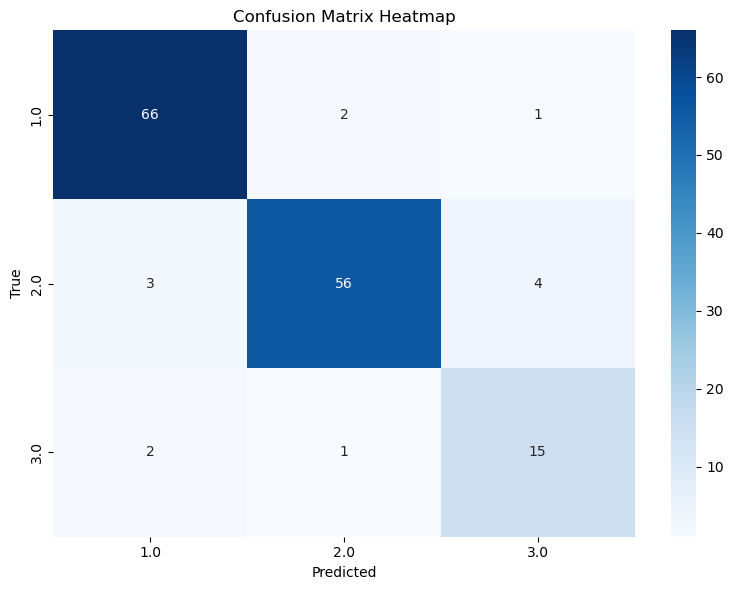

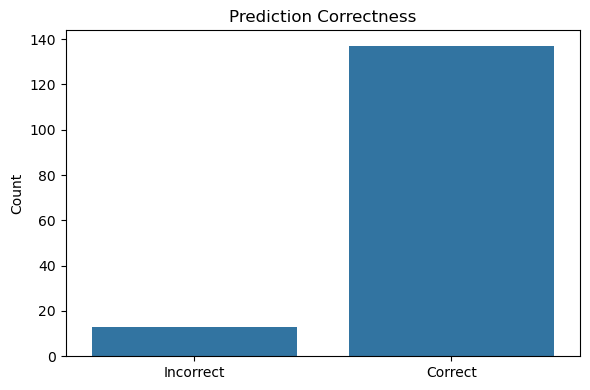

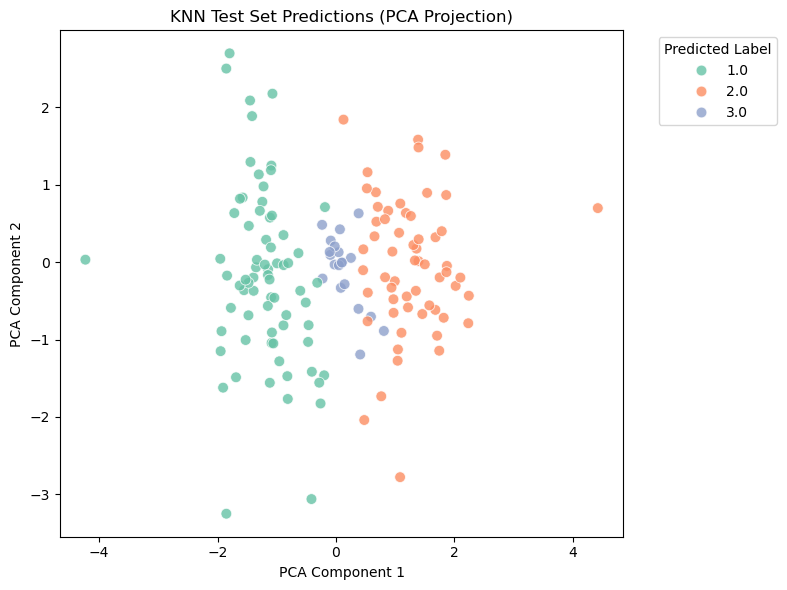

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 📌 Plot 1: Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 📌 Plot 2: Bar plot for correct vs incorrect predictions
correct = np.array(y_test) == np.array(y_pred)
plt.figure(figsize=(6, 4))
sns.countplot(x=correct)
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.title("Prediction Correctness")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 📌 Optional Plot 3: PCA 2D Projection of test set predictions
pca = PCA(n_components=2)
X_proj = pca.fit_transform(np.vstack((X_train, X_test)))
X_test_proj = X_proj[len(X_train):]  # only test points

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_proj[:, 0], y=X_test_proj[:, 1], hue=y_pred, palette="Set2", s=60, alpha=0.8)
plt.title("KNN Test Set Predictions (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Predicted Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


k = 1, Accuracy = 0.9133
k = 2, Accuracy = 0.9133
k = 3, Accuracy = 0.9200
k = 4, Accuracy = 0.9200
k = 5, Accuracy = 0.9133
k = 6, Accuracy = 0.9200
k = 7, Accuracy = 0.9200
k = 8, Accuracy = 0.9200
k = 9, Accuracy = 0.9200
k = 10, Accuracy = 0.9200
k = 11, Accuracy = 0.9200
k = 12, Accuracy = 0.9200
k = 13, Accuracy = 0.9200
k = 14, Accuracy = 0.9200
k = 15, Accuracy = 0.9133
k = 16, Accuracy = 0.9133
k = 17, Accuracy = 0.9133
k = 18, Accuracy = 0.9133
k = 19, Accuracy = 0.9133
k = 20, Accuracy = 0.9133


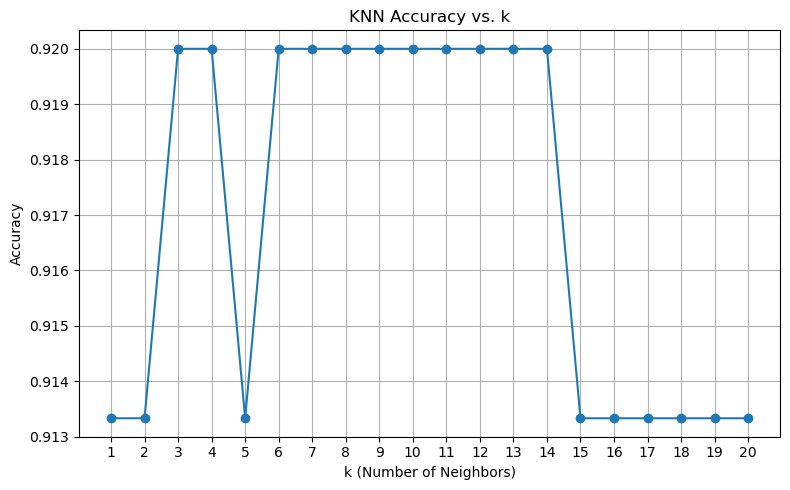

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 21)  # Try k from 1 to 20
accuracies = []

for k in k_values:
    y_pred_k = [knn_predict(X_train, y_train, x, k) for x in X_test]
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plotting accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs. k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def weighted_knn_predict(X_train, y_train, x_test, k, epsilon=1e-5):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train.iloc[i]))

    # Sort and get k nearest
    k_nearest = sorted(distances, key=lambda x: x[0])[:k]

    # Weighted voting
    class_weights = {}
    for dist, label in k_nearest:
        weight = 1 / (dist + epsilon)  # Avoid division by zero
        class_weights[label] = class_weights.get(label, 0) + weight

    return max(class_weights.items(), key=lambda x: x[1])[0]

# Predict with weighted KNN model_2
k = 5
y_pred_model2 = [weighted_knn_predict(X_train, y_train, x, k) for x in X_test]

# Evaluation
print("🔎 Classification Report (Weighted KNN - Model 2):")
print(classification_report(y_test, y_pred_model2))


🔎 Classification Report (Weighted KNN - Model 2):
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94        69
         2.0       0.95      0.89      0.92        63
         3.0       0.75      0.83      0.79        18

    accuracy                           0.91       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.92      0.91      0.91       150



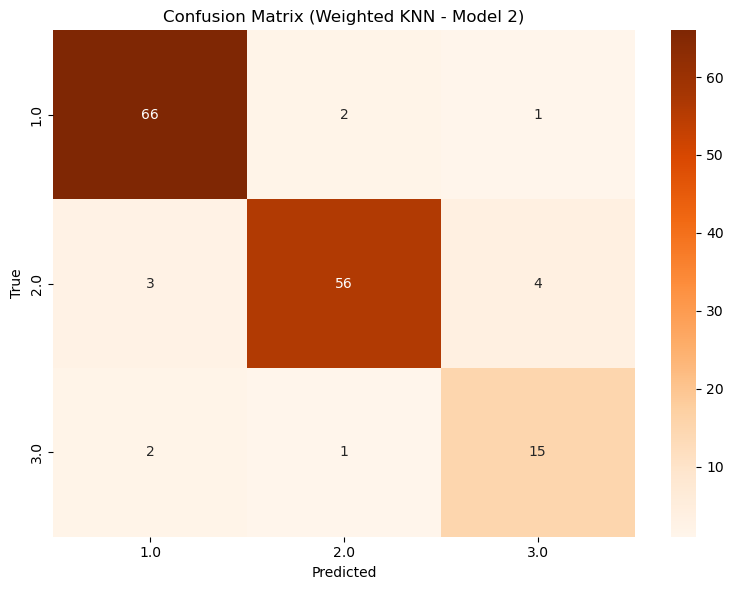

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_model2), annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Weighted KNN - Model 2)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


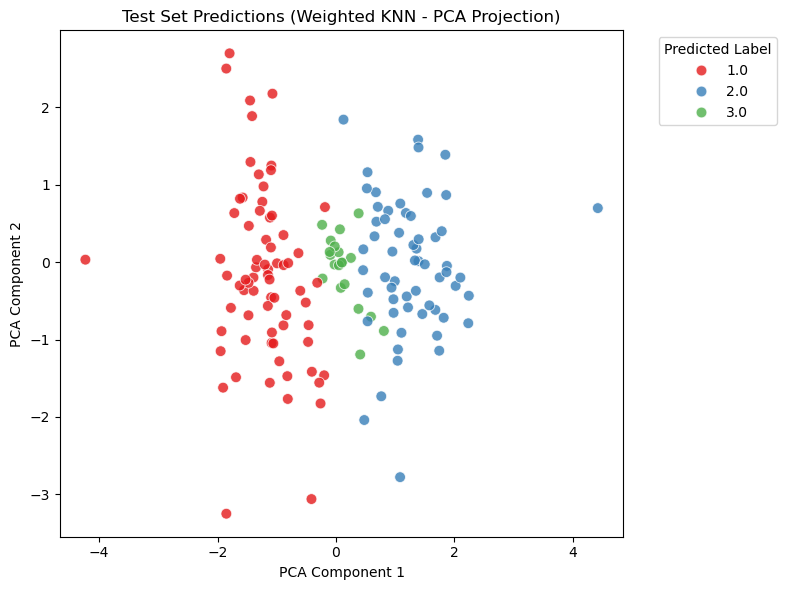

In [ ]:
from sklearn.decomposition import PCA

# Reuse PCA fit from earlier or re-fit
pca = PCA(n_components=2)
X_proj_all = pca.fit_transform(np.vstack((X_train, X_test)))
X_test_proj = X_proj_all[len(X_train):]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_proj[:, 0], y=X_test_proj[:, 1], hue=y_pred_model2, palette="Set1", s=60, alpha=0.8)
plt.title("Test Set Predictions (Weighted KNN - PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Predicted Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Parameters
k_neighbors = 5
n_splits = 5  # 5-fold cross-validation

# Store results
accuracies_model1 = []
accuracies_model2 = []

# K-fold setup
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, test_index in skf.split(features_scaled, labels):
    X_train_cv, X_test_cv = features_scaled[train_index], features_scaled[test_index]
    y_train_cv, y_test_cv = labels.iloc[train_index], labels.iloc[test_index]

    # Model 1: Regular KNN
    y_pred_cv1 = [knn_predict(X_train_cv, y_train_cv, x, k_neighbors) for x in X_test_cv]
    acc1 = accuracy_score(y_test_cv, y_pred_cv1)
    accuracies_model1.append(acc1)

    # Model 2: Weighted KNN
    y_pred_cv2 = [weighted_knn_predict(X_train_cv, y_train_cv, x, k_neighbors) for x in X_test_cv]
    acc2 = accuracy_score(y_test_cv, y_pred_cv2)
    accuracies_model2.append(acc2)

# Print average performance
print("📊 Cross-Validation Results:")
print(f"Regular KNN (Model 1) - Mean Accuracy: {np.mean(accuracies_model1):.4f}")
print(f"Weighted KNN (Model 2) - Mean Accuracy: {np.mean(accuracies_model2):.4f}")


📊 Cross-Validation Results:
Regular KNN (Model 1) - Mean Accuracy: 0.9540
Weighted KNN (Model 2) - Mean Accuracy: 0.9560
